# Coding Space for Final Assignment

"We looked at one indicator related to extreme heat: annual days where maximum temperatures exceed 35 degrees C (95 degrees F). This level of heat is associated with **severe health impacts** and stress to economies and infrastructure. The IPCC says extreme heat in urban areas will **increase levels of mortality** and **heat-related illnesses**, especially among the elderly and young children; impair concentration and cognition, affecting learning and educational outcomes for children." https://www.wri.org/insights/future-extreme-heat-cities-data 

Given that I am from the Democratic Republic of Congo, I decided to focus on urban settlements in this country.

In [10]:
#see if I can read the DRC_Cities.csv file

cat DRC_Cities.csv

Bandundu,Congo
Beni,Congo
Boende,Congo
Boma,Congo
Bukavu,Congo
Bunia,Congo
Buta,Congo
Butembo,Congo
Gbadolite,Congo
Gemena,Congo
Goma,Congo
Inongo,Congo
Isiro,Congo
Kabinda,Congo
Kalemie,Congo
Kamina,Congo
Kananga,Congo
Kenge,Congo
Kikwit,Congo
Kindu,Congo
Kinshasa,Congo
Kisangani,Congo
Kolwezi,Congo
Likasi,Congo
Lisala,Congo
Lubumbashi,Congo
Lumumbaville,Congo
Lusambo,Congo
Matadi,Congo
Mbandaka,Congo
Mbuji-Mayi,Congo
Mwene-Ditu,Congo
Tshikapa,Congo
Zongo,Congo


In [6]:
#Test the API
curl -s "https://nominatim.openstreetmap.org/search?q=Kabinda,Congo&format=json"  | jq

[
  {
    "place_id": 65004090,
    "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
    "osm_type": "node",
    "osm_id": 621235472,
    "lat": "-6.1368376",
    "lon": "24.4862256",
    "class": "place",
    "type": "town",
    "place_rank": 18,
    "importance": 0.30000999999999994,
    "addresstype": "town",
    "name": "Kabinda",
    "display_name": "Kabinda, Lomami, République démocratique du Congo",
    "boundingbox": [
      "-6.1768376",
      "-6.0968376",
      "24.4462256",
      "24.5262256"
    ]
  },
  {
    "place_id": 67016140,
    "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
    "osm_type": "way",
    "osm_id": 158967700,
    "lat": "-9.8618121",
    "lon": "26.5011834",
    "class": "waterway",
    "type": "stream",
    "place_rank": 22,
    "importance": 0.2000099999999999,
    "addresstype": "stream",
    "name": "Kabinda",
    "display_name": "Kabinda, Haut-Katanga, République démocratique d

In [11]:
#Find coordinates of the cities
#API with the DRC_Cities.csv file
echo "lat, long, city, addresstype" > DRCCities_Coordinates.csv
while read city
do    
    result=$(curl -s "https://nominatim.openstreetmap.org/search?q=${city}&format=json" | jq '.[] | [.lat, .lon, .name, .addresstype] | @csv')
    result2=$(echo "${result//\"/}")
    echo "${result2//\\/}"
done < DRC_Cities.csv >> DRCCities_Coordinates.csv

I then filtered and removed the duplicates and obtained the file: DRCCities_Coordinates_CLEAN.CSV

I then tried to find the number of days with temperature > 35 degrees in the identified urban settlements for 2022 by using https://open-meteo.com/en/docs/historical-weather-api#hourly=&daily=temperature_2m_max,precipitation_sum&location_mode=csv_coordinates 


I filtered the Pivot table to identify the number of days > 35 degrees in each city in 2022:

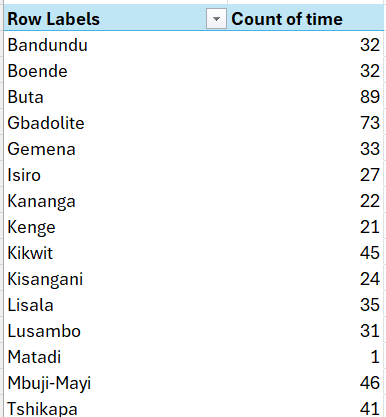